In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.io as pio
import pickle


Metrics Dependencies

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve


Validation Dependencies

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline


In [5]:
# Tuning
from sklearn.model_selection import GridSearchCV

# Feature Extraction
from sklearn.feature_selection import RFE

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder


Models of sklearn

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


Ensembles

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [19]:
warnings.filterwarnings('ignore')


sns.set_style("whitegrid", {'axes.grid' : False})
pio.templates.default = "plotly_white"


In [20]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
92386,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
92387,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
92388,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
92389,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [21]:
# Remove Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
92386,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
92387,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
92388,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
92389,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Spliting data to training and validation set

In [22]:
target ='label'
x = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=0)

Training the model

In [36]:
pipeline = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)

In [37]:
print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    

Training Accuracy Score: 96.8%
Validation Accuracy Score: 96.8%


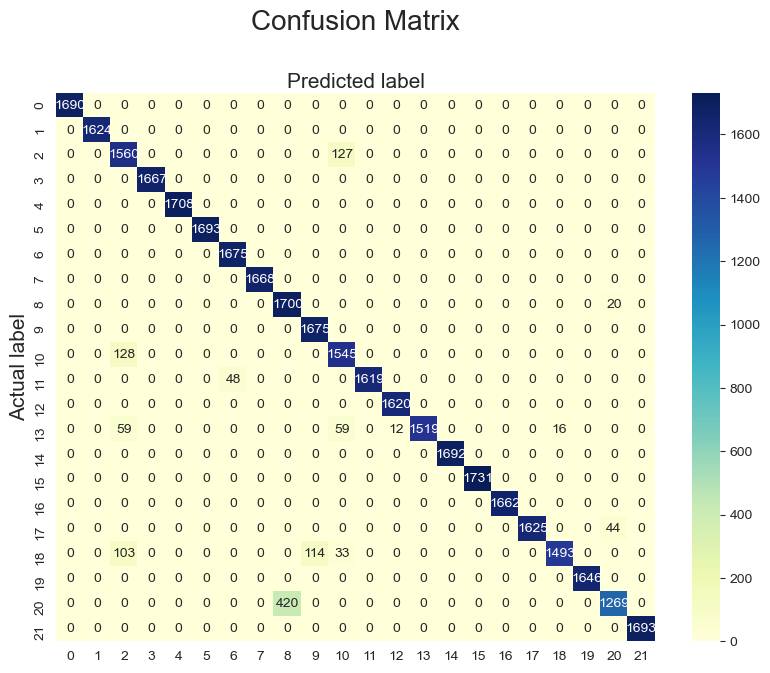

In [38]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', fontsize=20, y=1.1)
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.show()
    

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00      1690
      banana       1.00      1.00      1.00      1624
   blackgram       0.84      0.92      0.88      1687
    chickpea       1.00      1.00      1.00      1667
     coconut       1.00      1.00      1.00      1708
      coffee       1.00      1.00      1.00      1693
      cotton       0.97      1.00      0.99      1675
      grapes       1.00      1.00      1.00      1668
        jute       0.80      0.99      0.89      1720
 kidneybeans       0.94      1.00      0.97      1675
      lentil       0.88      0.92      0.90      1673
       maize       1.00      0.97      0.99      1667
       mango       0.99      1.00      1.00      1620
   mothbeans       1.00      0.91      0.95      1665
    mungbean       1.00      1.00      1.00      1692
   muskmelon       1.00      1.00      1.00      1731
      orange       1.00      1.00      1.00      1662
      papaya       1.00    

In [41]:
file = open('new--data-model.pkl', 'wb')
pickle.dump(model, file)